# 数据分析报告: Titanic生还者数据

## Phase 1: 提出问题阶段

Question1: 有哪些因素会让船上的人生还率更高？

Question2: 生还下来的人有何特点？

## Phase 2: 数据整理阶段

### Phase 2.1: 数据采集 

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 从CSV文件加载数据
titanic_full_df = pd.read_csv('titanic_data.csv')

titanic_full_df.head(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Phase 2.2: 数据清理 

Cabin信息缺失较多，有效信息较少，故删除此列

Ticket信息对分析生还率贡献较少，故删除此列

Name信息对分析生还率贡献较少，故删除此列

Embarked信息对分析生还率贡献较少，故删除此列

In [126]:
column_cleaned_df = titanic_full_df.drop(['Cabin','Ticket','Name','Embarked'], axis=1)
column_cleaned_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


为方便求均值，将Sex列中的female替换为0 male替换为1

In [127]:
column_cleaned_df.replace(to_replace='female',value=0,inplace=True)
column_cleaned_df.replace(to_replace='male',value=1,inplace=True)
column_cleaned_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500


年龄信息部分缺失，将所有缺失项删除，即删除所有的NaN

In [128]:
all_cleaned_titanic_df = column_cleaned_df.dropna(axis=0)

all_cleaned_titanic_df.count()

PassengerId    714
Survived       714
Pclass         714
Sex            714
Age            714
SibSp          714
Parch          714
Fare           714
dtype: int64

In [129]:
# 生成“生还者df”和“未生还者df”
def get_seperate_df(titanic_df):
    survived_df = titanic_df.copy()
    non_survived_df = titanic_df.copy()
    for ind in titanic_df.index:
        item = titanic_df.loc[ind]
        if item['Survived'] == 0:
            survived_df.drop(index=ind, axis=1, inplace=True)
        elif item['Survived'] == 1:
            non_survived_df.drop(index=ind, axis=1, inplace=True)
#     return (survived_df.head(n=5), non_survived_df.head(n=5))
    return (survived_df, non_survived_df)

#### 计算与年龄无关的数据（如pclass、性别等）时，使用未清理Age列中NaN的df数据，即：
survived_column_cleaned_df 和 non_survived_column_cleaned_df

In [130]:
# 清理了无用列之后的survivors和non_surviviors
survived_column_cleaned_df,non_survived_column_cleaned_df = get_seperate_df(column_cleaned_df)
print survived_column_cleaned_df.head()
print non_survived_column_cleaned_df.head()

   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare
1            2         1       1    0  38.0      1      0  71.2833
2            3         1       3    0  26.0      0      0   7.9250
3            4         1       1    0  35.0      1      0  53.1000
8            9         1       3    0  27.0      0      2  11.1333
9           10         1       2    0  14.0      1      0  30.0708
   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare
0            1         0       3    1  22.0      1      0   7.2500
4            5         0       3    1  35.0      0      0   8.0500
5            6         0       3    1   NaN      0      0   8.4583
6            7         0       1    1  54.0      0      0  51.8625
7            8         0       3    1   2.0      3      1  21.0750


#### 计算与年龄数据时，使用清理过Age列中NaN的df数据，即：
survived_all_cleaned_df 和 non_survived_all_cleaned_df

In [131]:
# 清理了无用列以及所有NaN之后的survivors和non_surviviors
survived_all_cleaned_df,non_survived_all_cleaned_df = get_seperate_df(all_cleaned_titanic_df)
print survived_all_cleaned_df.head()
print non_survived_all_cleaned_df.head()

   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare
1            2         1       1    0  38.0      1      0  71.2833
2            3         1       3    0  26.0      0      0   7.9250
3            4         1       1    0  35.0      1      0  53.1000
8            9         1       3    0  27.0      0      2  11.1333
9           10         1       2    0  14.0      1      0  30.0708
    PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare
0             1         0       3    1  22.0      1      0   7.2500
4             5         0       3    1  35.0      0      0   8.0500
6             7         0       1    1  54.0      0      0  51.8625
7             8         0       3    1   2.0      3      1  21.0750
12           13         0       3    1  20.0      0      0   8.0500


## Phase 3: 探索阶段

### Phase 3.1: 培养直觉

In [132]:
# 观察数据

titanic_full_df['Survived'].describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

此mean值含义为: 38.4%左右的乘客生还
std值无实际含义
***

In [133]:
titanic_full_df['Pclass'].describe()

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

二三pclass等级的乘客较多
*** 

In [134]:
titanic_full_df['Sex'].describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

男女乘客比为 577/(891-577) = 1.84:1

In [135]:
577.0/(891-577)

1.8375796178343948

***

In [136]:
titanic_full_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

年龄信息部分缺失，会影响后续计算精度，必要时需使用清理过Age列中NaN的数据

另，经观察：部分乘客年龄小于1岁，但考虑到可能是实际情况（孕期或者刚出生的小孩），此处不做清理
***

### Phase 3.2: 找出数据模式

### 有哪些因素会让船上的人生还率更高?

1.性别？

2.pclass等级？

3.年龄？
***

In [137]:
#计算相关性的方法 返回值在-1～1之间 绝对值越大 相关性越强
def correlation(x, y):
    '''
    calc correlation(Pearson's r) for column x and column y
    '''
    x_in_sd = x.std(ddof=0)
    x_stadardized = (x - x.mean())/ x_in_sd

    y_in_sd = y.std(ddof=0)
    y_stadardized = (y - y.mean())/ y_in_sd

    correlation = (x_stadardized * y_stadardized).mean()
    return correlation


直觉1：女性生存率高于男性

In [138]:
# 1. 性别
column_cleaned_df.groupby(['Sex', 'Survived']).count()['PassengerId']

Sex  Survived
0    0            81
     1           233
1    0           468
     1           109
Name: PassengerId, dtype: int64

女性生存遇难比约为3:1
男性生存遇难比约为1:4.5

In [139]:
# 计算性别与是否生还的相关性
survived = column_cleaned_df['Survived']
sex = column_cleaned_df['Sex']

print correlation(survived, sex)

-0.5433513806577553


Pearson's r = -0.54
说明性别与是否生还的相关性较强
***

直觉2：pclass1生存率 > pclass2生存率 > pclass3生存率

In [140]:
# 2. pclass等级
column_cleaned_df.groupby(['Pclass', 'Survived']).count()['PassengerId']

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: PassengerId, dtype: int64

pclass1生存遇难比约为1.7:1
pclass2生存遇难比约为0.9:1
pclass3生存遇难比约为0.3:1

In [141]:
# 计算pclass等级与是否生还的相关性
survived = column_cleaned_df['Survived']
pclass = column_cleaned_df['Pclass']

print correlation(survived, pclass)

-0.3384810359610152


Pearson's r = -0.34
说明pclass等级与是否生还的相关性较强
***

直觉3：年龄因素对是否生还贡献不大

In [142]:
# 3. 年龄

# 计算年龄与是否生还的相关性
survived = all_cleaned_titanic_df['Survived']
age = all_cleaned_titanic_df['Age']

print correlation(survived, age)

-0.07722109457217766


新建一个年龄段变量，对乘客根据年龄分组，以便对每一个组计算其存活率。

In [143]:
bins = np.arange(0,90,10)
all_cleaned_titanic_df['Age_group'] = pd.cut(all_cleaned_titanic_df['Age'], bins)
all_cleaned_titanic_df.groupby(['Age_group'])['PassengerId'].count()

/Users/jialbai/anaconda2/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Age_group
(0, 10]      64
(10, 20]    115
(20, 30]    230
(30, 40]    155
(40, 50]     86
(50, 60]     42
(60, 70]     17
(70, 80]      5
Name: PassengerId, dtype: int64

分组后计算不同年龄段的人口数和存活率，并且可视化

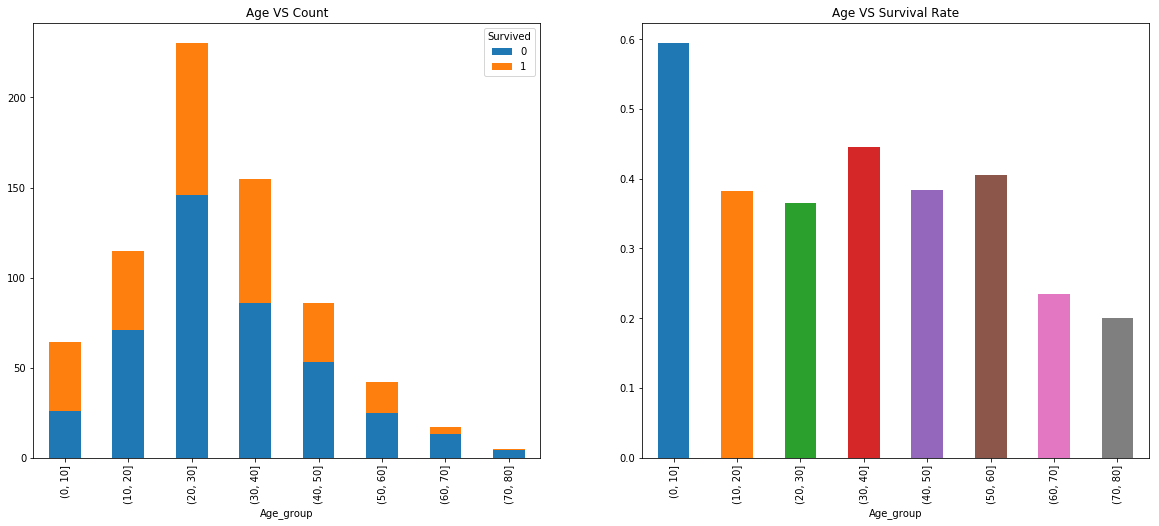

In [144]:
plt.figure(figsize = (12, 5))
f, (ax1, ax2) = plt.subplots(1,2)
f.set_size_inches((20,8))
all_cleaned_titanic_df.groupby(['Age_group', 'Survived'])['PassengerId'].count().unstack().plot(kind = 'bar', ax = ax1, stacked = True)

ax1.set_title('Age VS Count')
ax1.ylable = 'Count'
all_cleaned_titanic_df.groupby('Age_group')['Survived'].mean().plot(kind = 'bar', ax = ax2)
ax2.set_title('Age VS Survival Rate')
ax2.ylable = 'Survival Rate'
plt.show()

Pearson's r = -0.078 
年龄与是否生还的相关性不大
***

### 生还的人有何特点？

1.年龄特点

In [145]:
# 同样地，划分为年龄组进行计算
bins = np.arange(0,90,10)
survived_all_cleaned_df['Age_group'] = pd.cut(survived_all_cleaned_df['Age'], bins)
survived_all_cleaned_df.groupby(['Age_group'])['PassengerId'].count()

Age_group
(0, 10]     38
(10, 20]    44
(20, 30]    84
(30, 40]    69
(40, 50]    33
(50, 60]    17
(60, 70]     4
(70, 80]     1
Name: PassengerId, dtype: int64

Populating the interactive namespace from numpy and matplotlib


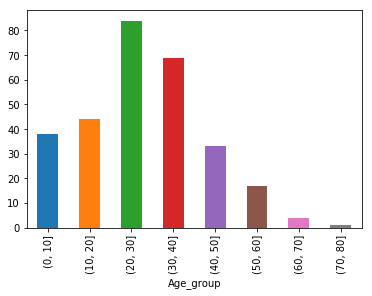

In [146]:
%pylab inline
survived_all_cleaned_df.groupby(['Age_group'])['PassengerId'].count().plot(kind = 'bar')

生还的人集中于40岁以下的乘客，40-60岁乘客少量生还，60岁以上乘客几乎没有生还。
***

2.性别特点

Populating the interactive namespace from numpy and matplotlib


([<matplotlib.patches.Wedge at 0x1a1d8c91d0>,
 [Text(-0.593159,0.926371,u'Female'), Text(0.593159,-0.926371,u'Male')],
 [Text(-0.323541,0.505293,u'68.13%'), Text(0.323541,-0.505293,u'31.87%')])

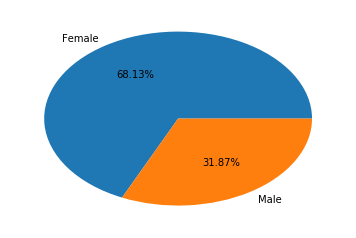

In [147]:
%pylab inline

plt.title = 'Proportion of Survivors in gender'
plt.pie(survived_column_cleaned_df.groupby(['Sex']).count()['PassengerId'], labels=['Female', 'Male'], autopct='%1.2f%%')

生还的人中，女性占比68.13%，男性占比31.87%。
***

3.pclass等级特点

Populating the interactive namespace from numpy and matplotlib


([<matplotlib.patches.Wedge at 0x1a1c99fb90>,
 [Text(0.347597,1.04364,u'Pclass=1'),
  Text(-1.08661,-0.17108,u'Pclass=2'),
  Text(0.505682,-0.976876,u'Pclass=3')],
 [Text(0.189599,0.569256,u'39.77%'),
  Text(-0.592699,-0.0933163,u'25.44%'),
  Text(0.275826,-0.532841,u'34.80%')])

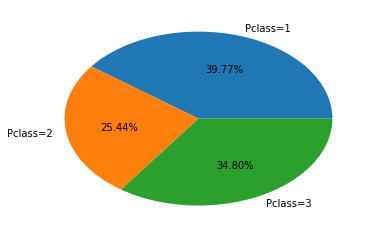

In [148]:
%pylab inline

# plt.title('Proportion of Survivors in Pclass')
plt.pie(survived_column_cleaned_df.groupby(['Pclass']).count()['PassengerId'], labels=['Pclass=1', 'Pclass=2', 'Pclass=3'], autopct='%1.2f%%')

生还乘客中，pclass1乘客最多(39.77%)，其次是pclass3乘客(34.80%)，pclass2乘客最少(25.44%)
***

## Phase 4: 结论阶段

#### 此次数据调查的一些局限，以及可能影响结论准确性的因素

1. 报告中使用的数据不是全部的乘客数据。样本的大小受到未收集到的数据影响。使用此样本进行计算，可能使计算结果产生偏差，不能完全代表整体人口，只能从一定程度上代表整体人口，置信概率此报告未给出。
2. 计算平均年龄时忽略了一些未收集到的NaN数据，可能会导致与实际平均年龄不符，但已经是基于此数据集的最接近结果。
3. 其他可能影响存活率的数据，如轮船客舱布局、同行亲属等，未纳入此次计算，不在此次数据调查范围内。

#### Question1: 有哪些因素会让船上的人生还率更高？

结论1: 女性生存率高于男性

性别与生还率的Pearson's r = -0.54 

性别与是否生还的相关性较强</br>

<font color=#0000ff>但并不说明性别完全基于相关性导致乘客是否生还</font>

结论2: pclass1生存率 > pclass2生存率 > pclass3生存率

pclass与生还率的Pearson's r = -0.34 

pclass等级与是否生还的相关性较强

<font color=#0000ff>但并不说明pclass等级完全基于相关性导致乘客是否生还</font>

结论3: 年龄因素对是否生还贡献不大

年龄与生还率的Pearson's r = Pearson's r = -0.078 

年龄与是否生还的相关性不大

#### Question2: 生还下来的人有何特点？

1.年龄特点

生还的人集中于40岁以下的乘客，40-60岁乘客少量生还，60岁以上乘客几乎没有生还。

2.性别特点

生还的人中，女性占比68.13%，男性占比31.87%

3.pclass等级特点

生还乘客中，pclass1乘客最多(39.77%)，其次是pclass3乘客(34.80%)，pclass2乘客最少(25.44%)

## Phase 5: 沟通阶段

#### Question1: 有哪些因素会让船上的人生还率更高？

结论1: 女性生存率高于男性

女性生存遇难比约为3 : 1 

男性生存遇难比约为1 : 4.5

结论2: pclass1生存率 > pclass2生存率 > pclass3生存率

pclass1生存遇难比约为1.7 : 1

pclass2生存遇难比约为0.9 : 1

pclass3生存遇难比约为0.3 : 1

结论3: 年龄因素对是否生还贡献不大 各年龄段的生还率并无明显差别

#### Question2: 生还下来的人有何特点？

1.年龄特点

生还的人集中于40岁以下的乘客，40-60岁乘客少量生还，60岁以上乘客几乎没有生还。

2.性别特点

生还的人中，女性占比68.13%，男性占比31.87%

3.pclass等级特点

生还乘客中，pclass1乘客最多(39.77%)，其次是pclass3乘客(34.80%)，pclass2乘客最少(25.44%)